# Install and Load Necessary Packages

In [0]:
!pip install scanpy[louvain]
!pip install scanpy[leiden]

     |████████████████████████████████| 6.5MB 3.7MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 2.9MB 41.4MB/s 
     |████████████████████████████████| 3.2MB 35.1MB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Created wheel for louvain: filename=louvain-0.6.1-cp36-cp36m-linux_x86_64.whl size=1025055 sha256=d732bdc014bd3eaf6bfe8f329fa2dc29da329da57b0b2d4bea415cb3613e581a
  Stored in directory: /root/.cache/pip/wheels/f2/c3/d4/f7abaf064186d6214ef952bbb72fd6c5136d4b17dbeaeff481
Successfully built louvain
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: h5py 2.8.0
    Uninstalling h5py-2.8.0:
      Successfully uninstalled 

In [0]:
import numpy as np
import pandas as pd

In [0]:
import scanpy as sc

**This just makes sure ScanPy will tell you what is going on**

In [0]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.0 louvain==0.6.1


# Mount Google Drive and Load Data Files

**Need to have the QSBSC folder in MyDrive prior to this step!**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Vanderbilt/QSBSC"

ZY3K.h5ad  ZY3K_umap.h5ad


Read in the data using ScanPy

In [0]:
adata = sc.read_csv(
    filename = "/content/drive/My Drive/Bioreg 2019-20/Bioreg II/MMII/Quantitative Systems Biology 2020/Data/GSM3067189_04hpf.csv").transpose() 

Read in cluster annotations and names using Pandas

In [0]:
adata = sc.read_h5ad("/content/drive/My Drive/Vanderbilt/QSBSC/ZY3K.h5ad")

Transforming to str index.


What does your data look like?

In [0]:
adata

AnnData object with n_obs × n_vars = 11124 × 22 
    obs: 'sample', 'rep'

In [0]:
adata.X

array([[3.44840668e+02, 2.49543285e+00, 3.06072521e+00, ...,
        2.79899502e+01, 1.49942768e+00, 2.97597408e+00],
       [5.47531433e+01, 0.00000000e+00, 5.85809469e+00, ...,
        8.57313995e+01, 5.47575855e+00, 0.00000000e+00],
       [4.53292206e+02, 1.02247864e+03, 0.00000000e+00, ...,
        3.81017327e+00, 2.19149704e+01, 5.06980324e+00],
       ...,
       [3.10194855e+02, 5.40765076e+01, 1.57043982e+01, ...,
        2.18004799e+01, 1.13084497e+01, 0.00000000e+00],
       [1.88201385e+02, 1.45604050e+00, 7.64121652e-01, ...,
        7.62249422e+00, 2.29580269e+01, 3.32914948e+00],
       [4.03882599e+02, 2.58297801e+00, 1.61761742e+01, ...,
        5.71830864e+01, 2.56666279e+00, 2.17052832e-01]], dtype=float32)

# Inspecting, Cleaning, and Normalizing Data

In [0]:
adata.var_names_make_unique()

Checking to make sure nothing is weird

normalizing counts per cell
    finished (0:00:00)


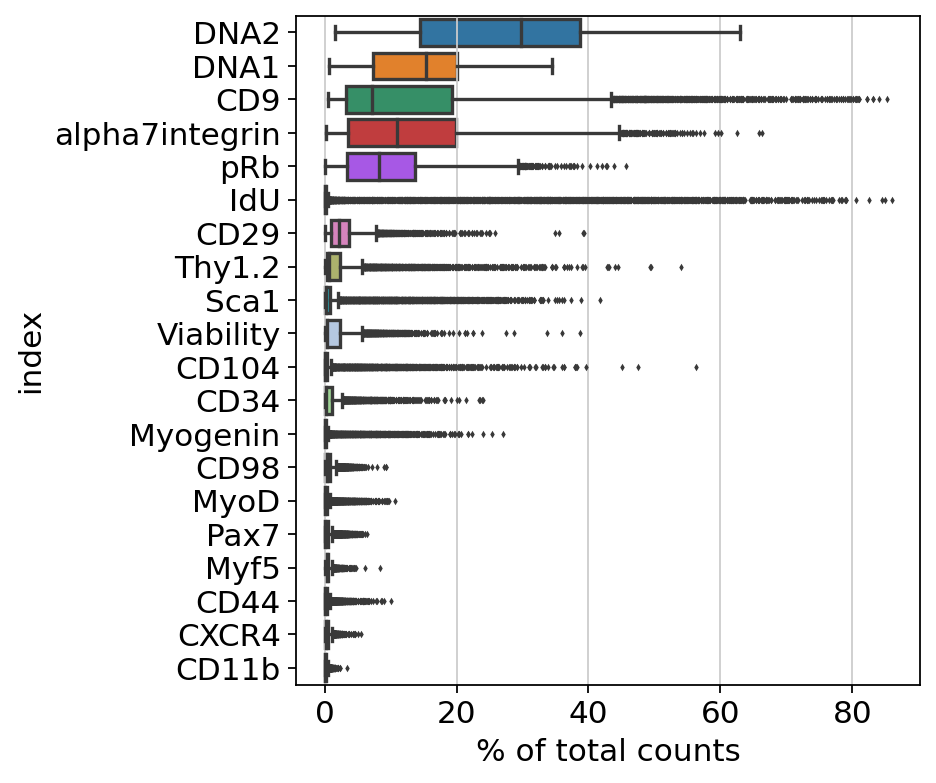

In [0]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [0]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 3450 genes that are detected in less than 3 cells


Add the total counts per cell as observations-annotation to adata


In [0]:
adata.obs['n_counts'] = adata.X.sum(axis=1)

Normalize and transform data matrix

In [0]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [0]:
sc.pp.log1p(adata)

/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_simple.py:298: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


Identify genes that are highly expressed and variable

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


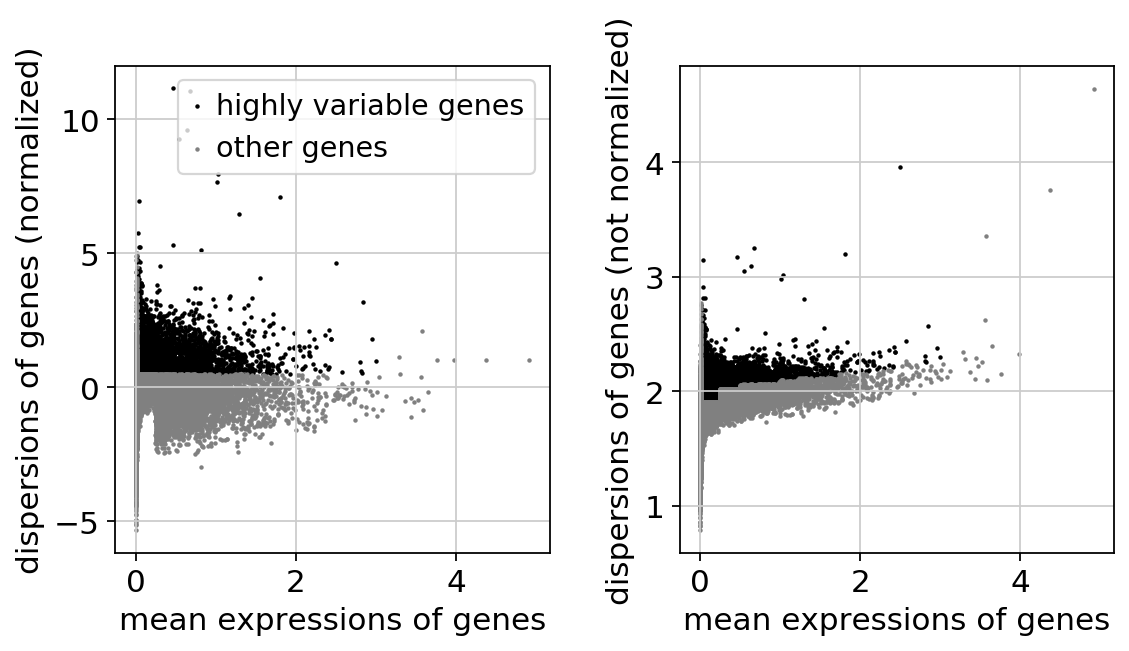

In [0]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

Subset data by variable genes and scale data

In [0]:
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['n_counts'])
sc.pp.scale(adata, max_value=10)

regressing out ['n_counts']
    finished (0:00:32)


# Plotting Data using Dimensionality Reduction Techniques

computing PCA with n_comps = 50
    finished (0:00:00)


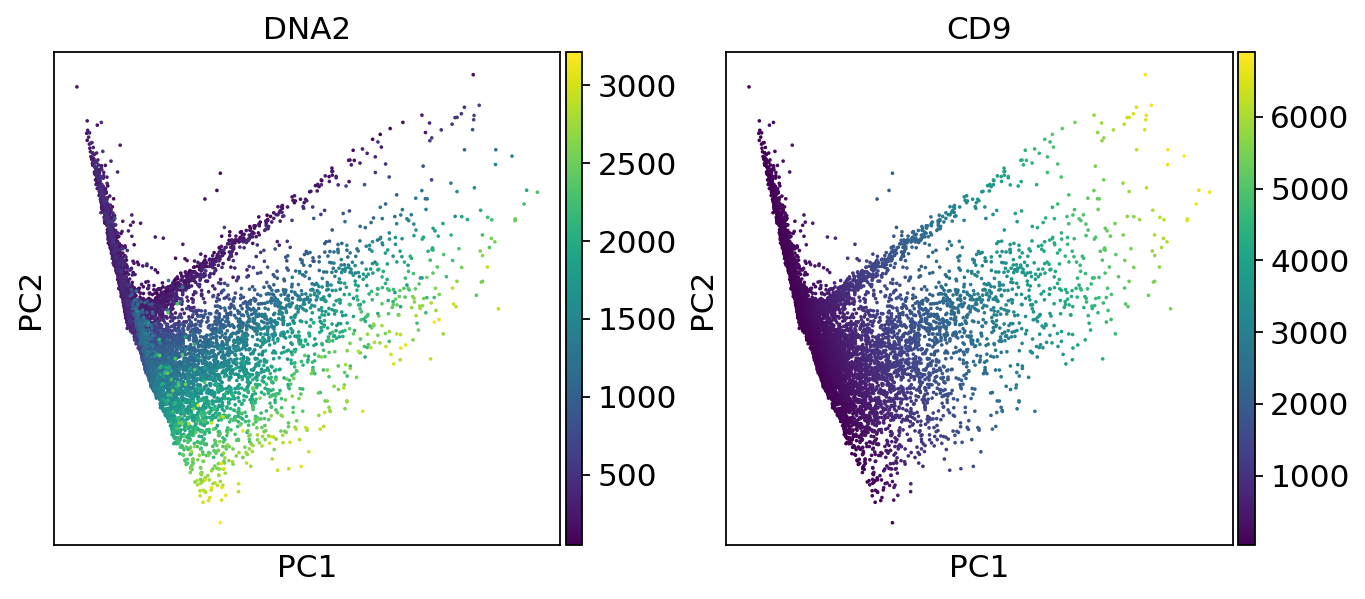

In [0]:
sc.tl.pca(adata)
sc.pl.pca(adata, color = ['DNA2','CD9'])
#sc.pl.pca(adata)

computing tSNE
    using data matrix X directly
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:36)


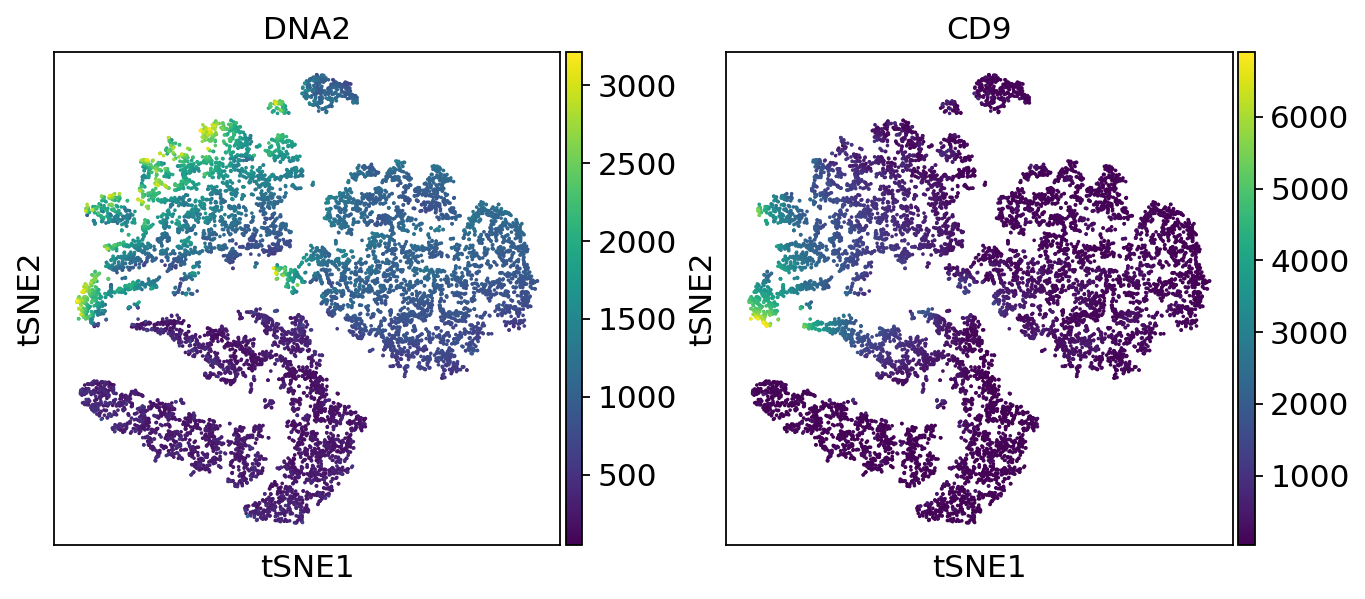

In [0]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color = ['DNA2', 'CD9'])


computing neighbors
    using data matrix X directly


/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


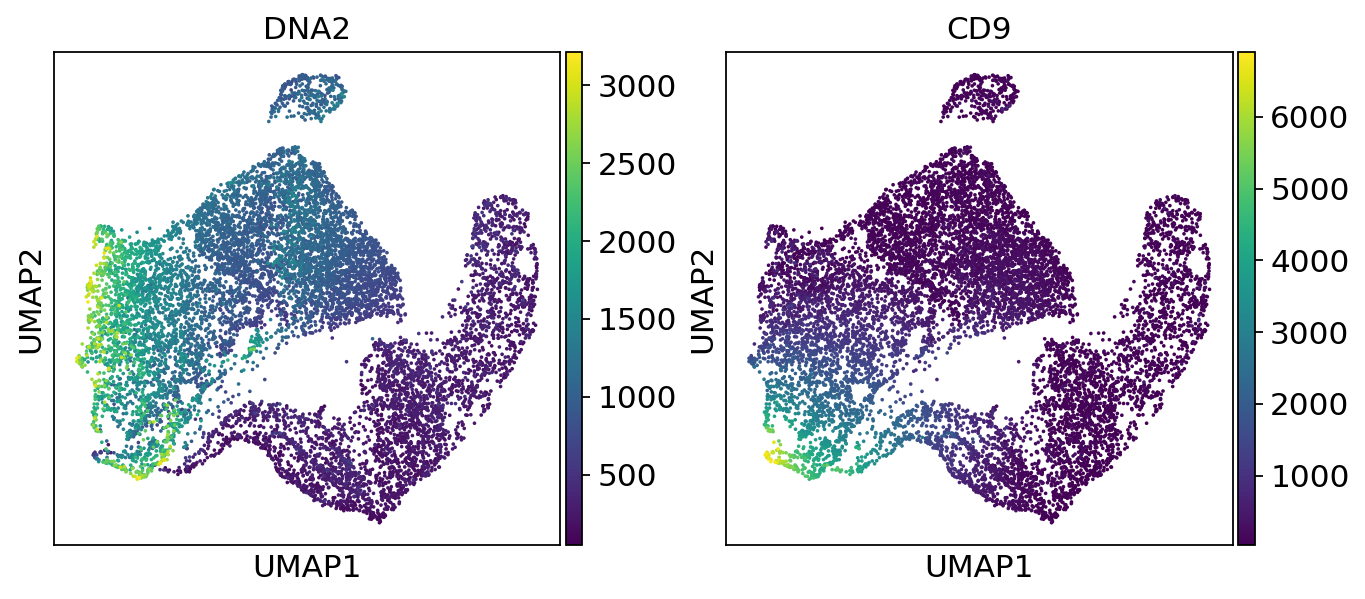

In [0]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['DNA2','CD9'])

# Identifying genes that contribute to clusters

In [0]:
sc.tl.rank_genes_groups(adata, 'Cluster', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

TypeError: ignored

# Unsupervised Clustering and Comparing Groups


Clustering to determine if similar groups arise to proposed clusters

running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


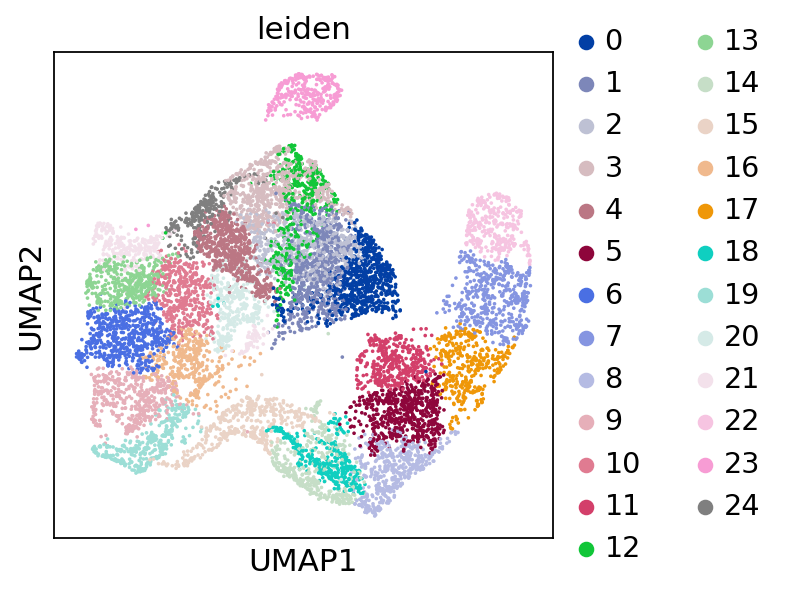

In [0]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:413: RuntimeWarning: overflow encountered in expm1
  foldchanges = (expm1_func(means[imask]) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:413: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (expm1_func(means[imask]) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


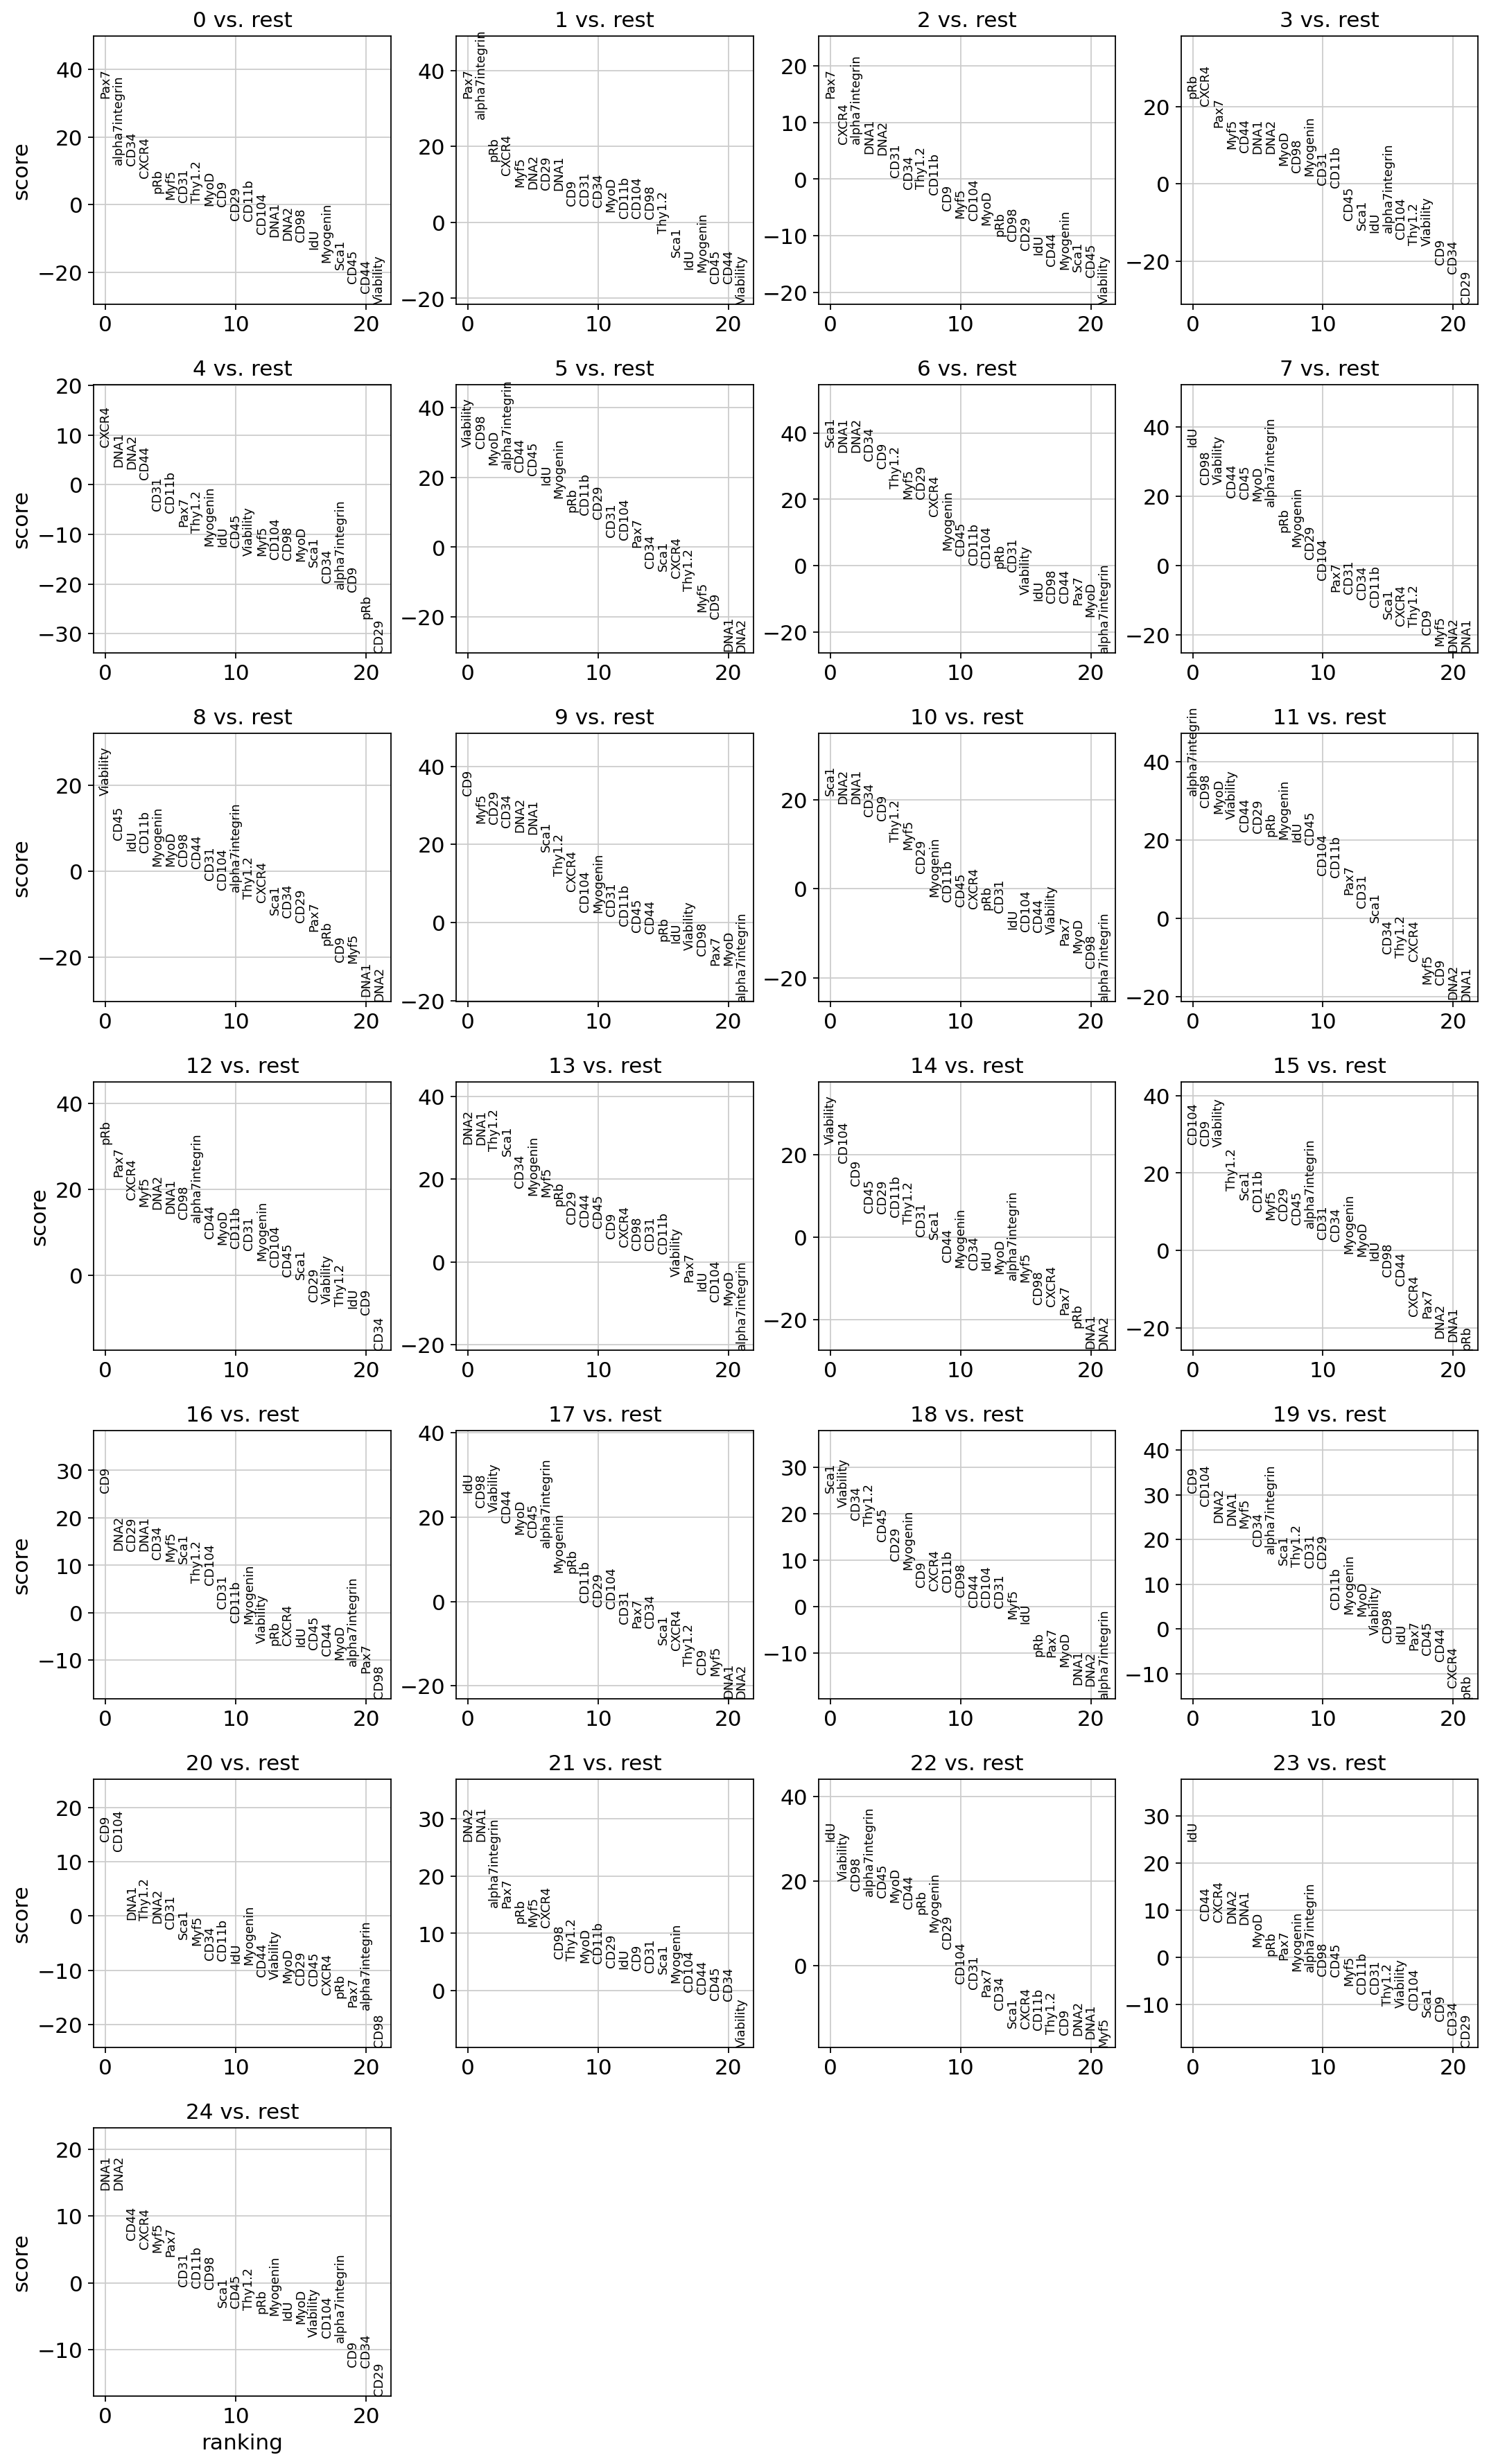

In [0]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)